In [5]:
!pip install pandas numpy scikit-learn tensorflow pyswarm matplotlib

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from pyswarm import pso
from scipy import stats

# Load the dataset
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values if any
df = df.dropna()

# Check for and remove duplicate rows
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])

# Check for other categorical columns and encode them
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':  # Skip already encoded column
        df[col] = label_encoder.fit_transform(df[col])

# Outlier detection (example using Z-score)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where Z-score is less than 3

# Drop non-numeric columns before normalization
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Check if numeric_df is empty before scaling
if not numeric_df.empty:
    # Normalize the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numeric_df.drop(['Attack Category', 'Label'], axis=1))

    # Combine scaled features with the target variable
    scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns[:-2])  # Use numeric columns
    scaled_df['Attack Category'] = df['Attack Category'].values
    scaled_df['Label'] = df['Label'].values  # Ensure 'Label' is also numeric or handle it accordingly
else:
    print("No data available after outlier removal.")






# Split the data into features and target
X = scaled_df.drop(['Attack Category', 'Label'], axis=1)
y = scaled_df['Label']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the data for LSTM input
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the objective function for PSO
def objective_function(params):
    units, dropout_rate = params
    model = create_lstm_model(int(units), dropout_rate)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

# Define the bounds for PSO
lb = [10, 0.1]  # Lower bounds for units and dropout rate
ub = [100, 0.5]  # Upper bounds for units and dropout rate

# Run PSO to optimize the hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Create the final LSTM model with the best parameters
best_units, best_dropout_rate = best_params
final_model = create_lstm_model(int(best_units), best_dropout_rate)

Missing values in each column:
Dir                0
Flgs               0
SrcAddr            0
DstAddr            0
Sport              0
Dport              0
SrcBytes           0
DstBytes           0
SrcLoad            0
DstLoad            0
SrcGap             0
DstGap             0
SIntPkt            0
DIntPkt            0
SIntPktAct         0
DIntPktAct         0
SrcJitter          0
DstJitter          0
sMaxPktSz          0
dMaxPktSz          0
sMinPktSz          0
dMinPktSz          0
Dur                0
Trans              0
TotPkts            0
TotBytes           0
Load               0
Loss               0
pLoss              0
pSrcLoss           0
pDstLoss           0
Rate               0
SrcMac             0
DstMac             0
Packet_num         0
Temp               0
SpO2               0
Pulse_Rate         0
SYS                0
DIA                0
Heart_rate         0
Resp_Rate          0
ST                 0
Attack Category    0
Label              0
dtype: int64
No data ava

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from pyswarm import pso
from scipy import stats

# Load the dataset
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values if any
df = df.dropna()

# Check for and remove duplicate rows
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])

# Check for other categorical columns and encode them
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':  # Skip already encoded column
        df[col] = label_encoder.fit_transform(df[col])

# Outlier detection (example using Z-score)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where Z-score is less than 3

# Drop non-numeric columns before normalization
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Check if numeric_df is empty before scaling
if not numeric_df.empty:
    # Normalize the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numeric_df.drop(['Attack Category', 'Label'], axis=1))

    # Combine scaled features with the target variable
    scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns[:-2])  # Use numeric columns
    scaled_df['Attack Category'] = df['Attack Category'].values
    scaled_df['Label'] = df['Label'].values  # Ensure 'Label' is also numeric or handle it accordingly

    # Prepare data for LSTM
    # Assuming 'timesteps' and 'features' are defined based on your data
    timesteps = 10  # Example value, adjust as needed
    features = scaled_df.shape[1] - 2  # Exclude 'Attack Category' and 'Label'

    # Reshape data for LSTM
    X = scaled_df.drop(['Attack Category', 'Label'], axis=1).values
    y = scaled_df['Label'].values
    X = X.reshape((X.shape[0] // timesteps, timesteps, features))  # Reshape for LSTM

    # Define the model
    model = Sequential()

    # Use Input layer to specify the input shape
    model.add(Input(shape=(timesteps, features)))  # Replace 'timesteps' and 'features' with actual values

    # Add LSTM layer
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    # Add more layers as needed
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation as needed

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Train the final model
    history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    # Make predictions on the test set
    y_pred = final_model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)


else:
    print("No data available after outlier removal.")

Missing values in each column:
Dir                0
Flgs               0
SrcAddr            0
DstAddr            0
Sport              0
Dport              0
SrcBytes           0
DstBytes           0
SrcLoad            0
DstLoad            0
SrcGap             0
DstGap             0
SIntPkt            0
DIntPkt            0
SIntPktAct         0
DIntPktAct         0
SrcJitter          0
DstJitter          0
sMaxPktSz          0
dMaxPktSz          0
sMinPktSz          0
dMinPktSz          0
Dur                0
Trans              0
TotPkts            0
TotBytes           0
Load               0
Loss               0
pLoss              0
pSrcLoss           0
pDstLoss           0
Rate               0
SrcMac             0
DstMac             0
Packet_num         0
Temp               0
SpO2               0
Pulse_Rate         0
SYS                0
DIA                0
Heart_rate         0
Resp_Rate          0
ST                 0
Attack Category    0
Label              0
dtype: int64
No data ava

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from scipy import stats

# Load the dataset
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
print("Initial data shape:", df.shape)

# Drop rows with missing values if any
df = df.dropna()
print("Shape after dropping NA:", df.shape)

# Check for and remove duplicate rows
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Print data types of columns
print("\nColumn data types:")
print(df.dtypes)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])

# Check for other categorical columns and encode them
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols)
for col in categorical_cols:
    if col != 'Attack Category':
        df[col] = label_encoder.fit_transform(df[col])

# Select numeric columns before z-score calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:", numeric_cols)

# Outlier detection (using Z-score)
print("\nShape before outlier removal:", df.shape)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]
print("Shape after outlier removal:", df.shape)

# Drop non-numeric columns before normalization
numeric_df = df.select_dtypes(include=[np.number])
print("\nNumeric DataFrame shape:", numeric_df.shape)
print("Numeric columns:", numeric_df.columns.tolist())

if not numeric_df.empty:
    # Verify 'Attack Category' and 'Label' are in numeric_df
    print("\nChecking target variables:")
    print("'Attack Category' in numeric_df:", 'Attack Category' in numeric_df.columns)
    print("'Label' in numeric_df:", 'Label' in numeric_df.columns)
    
    # Normalize the data
    features_to_scale = numeric_df.columns.difference(['Attack Category', 'Label'])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numeric_df[features_to_scale])
    
    # Combine scaled features with the target variable
    scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
    scaled_df['Attack Category'] = numeric_df['Attack Category'].values
    scaled_df['Label'] = numeric_df['Label'].values
    
    # Print shapes for debugging
    print("\nScaled DataFrame shape:", scaled_df.shape)
    
    # Prepare data for LSTM
    timesteps = 10
    features = len(features_to_scale)
    print(f"\nTimesteps: {timesteps}, Features: {features}")
    
    # Reshape data for LSTM
    X = scaled_df.drop(['Attack Category', 'Label'], axis=1).values
    y = scaled_df['Label'].values
    
    # Check if data can be reshaped
    if X.shape[0] % timesteps != 0:
        # Trim data to make it divisible by timesteps
        trim_size = X.shape[0] - (X.shape[0] % timesteps)
        X = X[:trim_size]
        y = y[:trim_size]
    
    X = X.reshape((X.shape[0] // timesteps, timesteps, features))
    print("\nFinal X shape:", X.shape)
    print("Final y shape:", y.shape)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define and compile the model
    model = Sequential([
        Input(shape=(timesteps, features)),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
else:
    print("No data available after outlier removal.")

Initial data shape: (16318, 45)
Shape after dropping NA: (16318, 45)
Shape after dropping duplicates: (16318, 45)

Column data types:
Dir                 object
Flgs                object
SrcAddr             object
DstAddr             object
Sport               object
Dport                int64
SrcBytes             int64
DstBytes             int64
SrcLoad            float64
DstLoad            float64
SrcGap               int64
DstGap               int64
SIntPkt            float64
DIntPkt            float64
SIntPktAct         float64
DIntPktAct           int64
SrcJitter          float64
DstJitter          float64
sMaxPktSz            int64
dMaxPktSz            int64
sMinPktSz            int64
dMinPktSz            int64
Dur                float64
Trans                int64
TotPkts              int64
TotBytes             int64
Load               float64
Loss                 int64
pLoss              float64
pSrcLoss           float64
pDstLoss           float64
Rate               float64
Sr

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# Load the dataset
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
print("Initial data shape:", df.shape)

# Drop rows with missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()
print("Shape after dropping NA and duplicates:", df.shape)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':
        df[col] = label_encoder.fit_transform(df[col])

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nAnalyzing distributions for numeric columns:")

# Print statistics before outlier removal
print("\nBefore outlier removal statistics:")
print(df[numeric_cols].describe())

# Modified outlier detection approach
# Method 1: Using a more lenient z-score threshold
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_lenient = df[(z_scores < 5).all(axis=1)]  # Using 5 instead of 3
print("\nShape after lenient z-score (threshold=5):", df_lenient.shape)

# Method 2: Using IQR method
def remove_outliers_iqr(df, columns, k=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_iqr = remove_outliers_iqr(df, numeric_cols)
print("Shape after IQR method:", df_iqr.shape)

# Method 3: Using percentile-based filtering
def remove_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
    df_clean = df.copy()
    for col in columns:
        lower = np.percentile(df_clean[col], lower_percentile)
        upper = np.percentile(df_clean[col], upper_percentile)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_percentile = remove_outliers_percentile(df, numeric_cols)
print("Shape after percentile method:", df_percentile.shape)

# Choose the most appropriate method based on results
# For this example, let's use the IQR method as it's often a good balance
df_cleaned = df_iqr

print("\nFinal shape after chosen outlier removal method:", df_cleaned.shape)
print("\nAfter outlier removal statistics:")
print(df_cleaned[numeric_cols].describe())

Initial data shape: (16318, 45)
Shape after dropping NA and duplicates: (16318, 45)

Analyzing distributions for numeric columns:

Before outlier removal statistics:
           Dir          Flgs  SrcAddr  DstAddr         Sport    Dport  \
count  16318.0  16318.000000  16318.0  16318.0  16318.000000  16318.0   
mean       0.0      3.789190      0.0      0.0   8156.157434   1111.0   
std        0.0      0.948991      0.0      0.0   4709.841490      0.0   
min        0.0      0.000000      0.0      0.0      0.000000   1111.0   
25%        0.0      4.000000      0.0      0.0   4077.250000   1111.0   
50%        0.0      4.000000      0.0      0.0   8156.500000   1111.0   
75%        0.0      4.000000      0.0      0.0  12234.750000   1111.0   
max        0.0      6.000000      0.0      0.0  16313.000000   1111.0   

           SrcBytes      DstBytes       SrcLoad       DstLoad  ...  \
count  16318.000000  16318.000000  1.631800e+04  1.631800e+04  ...   
mean     496.650264    187.077706  2

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Load and preprocess the data
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
df = df.dropna()
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':
        df[col] = label_encoder.fit_transform(df[col])

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Use percentile-based outlier removal (preserves more data)
def remove_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
    df_clean = df.copy()
    for col in columns:
        lower = np.percentile(df_clean[col], lower_percentile)
        upper = np.percentile(df_clean[col], upper_percentile)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers_percentile(df, numeric_cols)
print("Dataset shape after cleaning:", df_cleaned.shape)

# Normalize the features
scaler = StandardScaler()
features_to_scale = numeric_cols.drop(['Attack Category', 'Label'])
scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df['Attack Category'] = df_cleaned['Attack Category'].values
scaled_df['Label'] = df_cleaned['Label'].values

# Prepare data for LSTM
timesteps = 10
features = len(features_to_scale)
print(f"Number of features: {features}")

# Reshape data for LSTM
X = scaled_df.drop(['Attack Category', 'Label'], axis=1).values
y = scaled_df['Label'].values

# Trim data to make it divisible by timesteps
trim_size = X.shape[0] - (X.shape[0] % timesteps)
X = X[:trim_size]
y = y[:trim_size]

X = X.reshape((X.shape[0] // timesteps, timesteps, features))
print("X shape after reshaping:", X.shape)
print("y shape:", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Define the model
model = Sequential([
    Input(shape=(timesteps, features)),
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Print model summary
model.summary()

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
print("\nEvaluating model on test set:")
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]*100:.2f}%")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(cm)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Dataset shape after cleaning: (11912, 45)
Number of features: 43
X shape after reshaping: (1191, 10, 43)
y shape: (11910,)


ValueError: Found input variables with inconsistent numbers of samples: [1191, 11910]

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Load and preprocess the data
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
df = df.dropna()
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':
        df[col] = label_encoder.fit_transform(df[col])

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Use percentile-based outlier removal
def remove_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
    df_clean = df.copy()
    for col in columns:
        lower = np.percentile(df_clean[col], lower_percentile)
        upper = np.percentile(df_clean[col], upper_percentile)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers_percentile(df, numeric_cols)
print("Dataset shape after cleaning:", df_cleaned.shape)

# Normalize the features
scaler = StandardScaler()
features_to_scale = numeric_cols.drop(['Attack Category', 'Label'])
scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df['Attack Category'] = df_cleaned['Attack Category'].values
scaled_df['Label'] = df_cleaned['Label'].values

# Prepare data for LSTM
timesteps = 10
features = len(features_to_scale)
print(f"Number of features: {features}")

# Reshape data for LSTM
X = scaled_df.drop(['Attack Category', 'Label'], axis=1).values
y = scaled_df['Label'].values

# First split the data, then reshape
X_train_flat, X_test_flat, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trim data to make it divisible by timesteps
trim_size_train = X_train_flat.shape[0] - (X_train_flat.shape[0] % timesteps)
trim_size_test = X_test_flat.shape[0] - (X_test_flat.shape[0] % timesteps)

X_train_flat = X_train_flat[:trim_size_train]
y_train = y_train[:trim_size_train]
X_test_flat = X_test_flat[:trim_size_test]
y_test = y_test[:trim_size_test]

# Reshape after trimming
X_train = X_train_flat.reshape(-1, timesteps, features)
X_test = X_test_flat.reshape(-1, timesteps, features)

print("\nFinal shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the model
model = Sequential([
    Input(shape=(timesteps, features)),
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Print model summary
model.summary()

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
print("\nEvaluating model on test set:")
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]*100:.2f}%")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(cm)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Dataset shape after cleaning: (11912, 45)
Number of features: 43

Final shapes:
X_train shape: (952, 10, 43)
y_train shape: (9520,)
X_test shape: (238, 10, 43)
y_test shape: (2380,)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 10, 64)         │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,609 (158.63 KB)

 Trainable params: 40,609 (158.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - Precision: 0.0808 - Recall: 0.1532 - accuracy: 0.8185 - loss: 0.6122 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9215 - val_loss: 0.3096
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.9366 - loss: 0.2676 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9215 - val_loss: 0.2859
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.9389 - loss: 0.2462 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9215 - val_loss: 0.2748
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Precision: 0.3600 - Recall: 0.0091 - accuracy: 0.9440 - loss: 0.2117 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9215 - val_loss: 0.2726
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.9563 -

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 238
'y' sizes: 2380


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Load and preprocess the data
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
df = df.dropna()
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':
        df[col] = label_encoder.fit_transform(df[col])

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Use percentile-based outlier removal
def remove_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
    df_clean = df.copy()
    for col in columns:
        lower = np.percentile(df_clean[col], lower_percentile)
        upper = np.percentile(df_clean[col], upper_percentile)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers_percentile(df, numeric_cols)
print("Dataset shape after cleaning:", df_cleaned.shape)

# Normalize the features
scaler = StandardScaler()
features_to_scale = numeric_cols.drop(['Attack Category', 'Label'])
scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df['Attack Category'] = df_cleaned['Attack Category'].values
scaled_df['Label'] = df_cleaned['Label'].values

# Prepare data for LSTM
timesteps = 10
features = len(features_to_scale)
print(f"Number of features: {features}")

# Get features and labels
X = scaled_df.drop(['Attack Category', 'Label'], axis=1).values
y = scaled_df['Label'].values

# Ensure the number of samples is divisible by timesteps
n_samples = (X.shape[0] // timesteps) * timesteps
X = X[:n_samples]
y = y[:n_samples]

# Reshape X into sequences
X = X.reshape(-1, timesteps, features)
# Reshape y to match X's first dimension
y = y.reshape(-1, timesteps).mean(axis=1)

print("Shape of X after reshaping:", X.shape)
print("Shape of y after reshaping:", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFinal shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the model
model = Sequential([
    Input(shape=(timesteps, features)),
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Print model summary
model.summary()

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
print("\nEvaluating model on test set:")
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]*100:.2f}%")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(cm)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Dataset shape after cleaning: (11912, 45)
Number of features: 43
Shape of X after reshaping: (1191, 10, 43)
Shape of y after reshaping: (1191,)

Final shapes:
X_train shape: (952, 10, 43)
y_train shape: (952,)
X_test shape: (239, 10, 43)
y_test shape: (239,)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                  │ (None, 10, 64)         │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,609 (158.63 KB)

 Trainable params: 40,609 (158.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - Precision: 0.5549 - Recall: 0.1452 - accuracy: 0.8859 - loss: 0.5089 - val_Precision: 1.0000 - val_Recall: 0.2692 - val_accuracy: 0.8848 - val_loss: 0.1902
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Precision: 1.0000 - Recall: 0.3259 - accuracy: 0.9070 - loss: 0.1356 - val_Precision: 1.0000 - val_Recall: 0.5385 - val_accuracy: 0.9058 - val_loss: 0.1113
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Precision: 1.0000 - Recall: 0.6342 - accuracy: 0.9135 - loss: 0.0844 - val_Precision: 1.0000 - val_Recall: 0.6923 - val_accuracy: 0.9058 - val_loss: 0.0976
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Precision: 1.0000 - Recall: 0.7799 - accuracy: 0.9307 - loss: 0.0633 - val_Precision: 1.0000 - val_Recall: 0.8077 - val_accuracy: 0.9058 - val_loss: 0.0910
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Precision: 1.0000 - Recall: 0.7526 - accuracy: 0.9269 - loss: 0.0514 - val_Precision: 1.0000 - val_Recall: 0.76

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the data
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
df = df.dropna()
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':
        df[col] = label_encoder.fit_transform(df[col])

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Use percentile-based outlier removal
def remove_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
    df_clean = df.copy()
    for col in columns:
        lower = np.percentile(df_clean[col], lower_percentile)
        upper = np.percentile(df_clean[col], upper_percentile)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers_percentile(df, numeric_cols)
print("Dataset shape after cleaning:", df_cleaned.shape)

# Normalize the features
scaler = StandardScaler()
features_to_scale = numeric_cols.drop(['Attack Category', 'Label'])
scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df['Attack Category'] = df_cleaned['Attack Category'].values
scaled_df['Label'] = df_cleaned['Label'].values

# Prepare data for LSTM
timesteps = 10
features = len(features_to_scale)
print(f"Number of features: {features}")

# Get features and labels
X = scaled_df.drop(['Attack Category', 'Label'], axis=1).values
y = scaled_df['Label'].values

# Ensure the number of samples is divisible by timesteps
n_samples = (X.shape[0] // timesteps) * timesteps
X = X[:n_samples]
y = y[:n_samples]

# Reshape X into sequences
X = X.reshape(-1, timesteps, features)
# Reshape y to match X's first dimension
y = y.reshape(-1, timesteps).mean(axis=1)

print("Shape of X after reshaping:", X.shape)
print("Shape of y after reshaping:", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFinal shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the model
model = Sequential([
    Input(shape=(timesteps, features)),
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Print model summary
model.summary()

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
print("\nEvaluating model on test set:")
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]*100:.2f}%")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")

# Make predictions and ensure binary values
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()  # Flatten the predictions
y_test_binary = (y_test > 0.5).astype(int)  # Ensure test labels are binary

# Verify shapes and types
print("\nPrediction shapes:")
print("y_test_binary shape:", y_test_binary.shape)
print("y_pred_binary shape:", y_pred_binary.shape)

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("\nConfusion Matrix:")
print(cm)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary))

# Print detailed metrics
print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.4f}")
print(f"Precision: {precision_score(y_test_binary, y_pred_binary, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test_binary, y_pred_binary, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test_binary, y_pred_binary, zero_division=0):.4f}")

# Print first few predictions vs actual values
print("\nFirst few predictions vs actual values:")
for i in range(min(10, len(y_test_binary))):
    print(f"Actual: {y_test_binary[i]}, Predicted: {y_pred_binary[i]}, Raw Prediction: {y_pred[i][0]:.4f}")

Dataset shape after cleaning: (11912, 45)
Number of features: 43
Shape of X after reshaping: (1191, 10, 43)
Shape of y after reshaping: (1191,)

Final shapes:
X_train shape: (952, 10, 43)
y_train shape: (952,)
X_test shape: (239, 10, 43)
y_test shape: (239,)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                  │ (None, 10, 64)         │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,609 (158.63 KB)

 Trainable params: 40,609 (158.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - Precision: 0.2138 - Recall: 0.5903 - accuracy: 0.6364 - loss: 0.6384 - val_Precision: 1.0000 - val_Recall: 0.4231 - val_accuracy: 0.9058 - val_loss: 0.3186
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Precision: 1.0000 - Recall: 0.5895 - accuracy: 0.9345 - loss: 0.2086 - val_Precision: 1.0000 - val_Recall: 0.4231 - val_accuracy: 0.9058 - val_loss: 0.1246
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Precision: 1.0000 - Recall: 0.7605 - accuracy: 0.9352 - loss: 0.0657 - val_Precision: 1.0000 - val_Recall: 0.6538 - val_accuracy: 0.9058 - val_loss: 0.1050
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Precision: 1.0000 - Recall: 0.7512 - accuracy: 0.9342 - loss: 0.0640 - val_Precision: 1.0000 - val_Recall: 0.8462 - val_accuracy: 0.9058 - val_loss: 0.0873
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Precision: 1.0000 - Recall: 0.8057 - accuracy: 0.9281 - loss: 0.0539 - val_Precision: 1.0000 - val_Recall: 0.80

Dataset shape after cleaning: (11912, 45)
Number of features: 43
Shape of X after reshaping: (1191, 10, 43)
Shape of y after reshaping: (1191,)

Final shapes:
X_train shape: (952, 10, 43)
y_train shape: (952,)
X_test shape: (239, 10, 43)
y_test shape: (239,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,609 (158.63 KB)

 Trainable params: 40,609 (158.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - Precision: 0.0441 - Recall: 0.0548 - accuracy: 0.6944 - loss: 0.6217 - val_Precision: 1.0000 - val_Recall: 0.0385 - val_accuracy: 0.8691 - val_loss: 0.3381
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - Precision: 1.0000 - Recall: 0.3015 - accuracy: 0.9102 - loss: 0.2469 - val_Precision: 1.0000 - val_Recall: 0.4231 - val_accuracy: 0.9058 - val_loss: 0.1328
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - Precision: 1.0000 - Recall: 0.6856 - accuracy: 0.9198 - loss: 0.1041 - val_Precision: 1.0000 - val_Recall: 0.6538 - val_accuracy: 0.9058 - val_loss: 0.0998
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - Precision: 1.0000 - Recall: 0.6755 - accuracy: 0.9220 - loss: 0.0729 - val_Precision: 1.0000 - val_Recall: 0.8077 - val_accuracy: 0.9058 - val_loss: 0.0902
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - Precision: 1.0000 - Recall: 0.8134 - accuracy: 0.9346 - loss: 0.0548 - val_Precision: 1.0000 - val_Recall: 0.

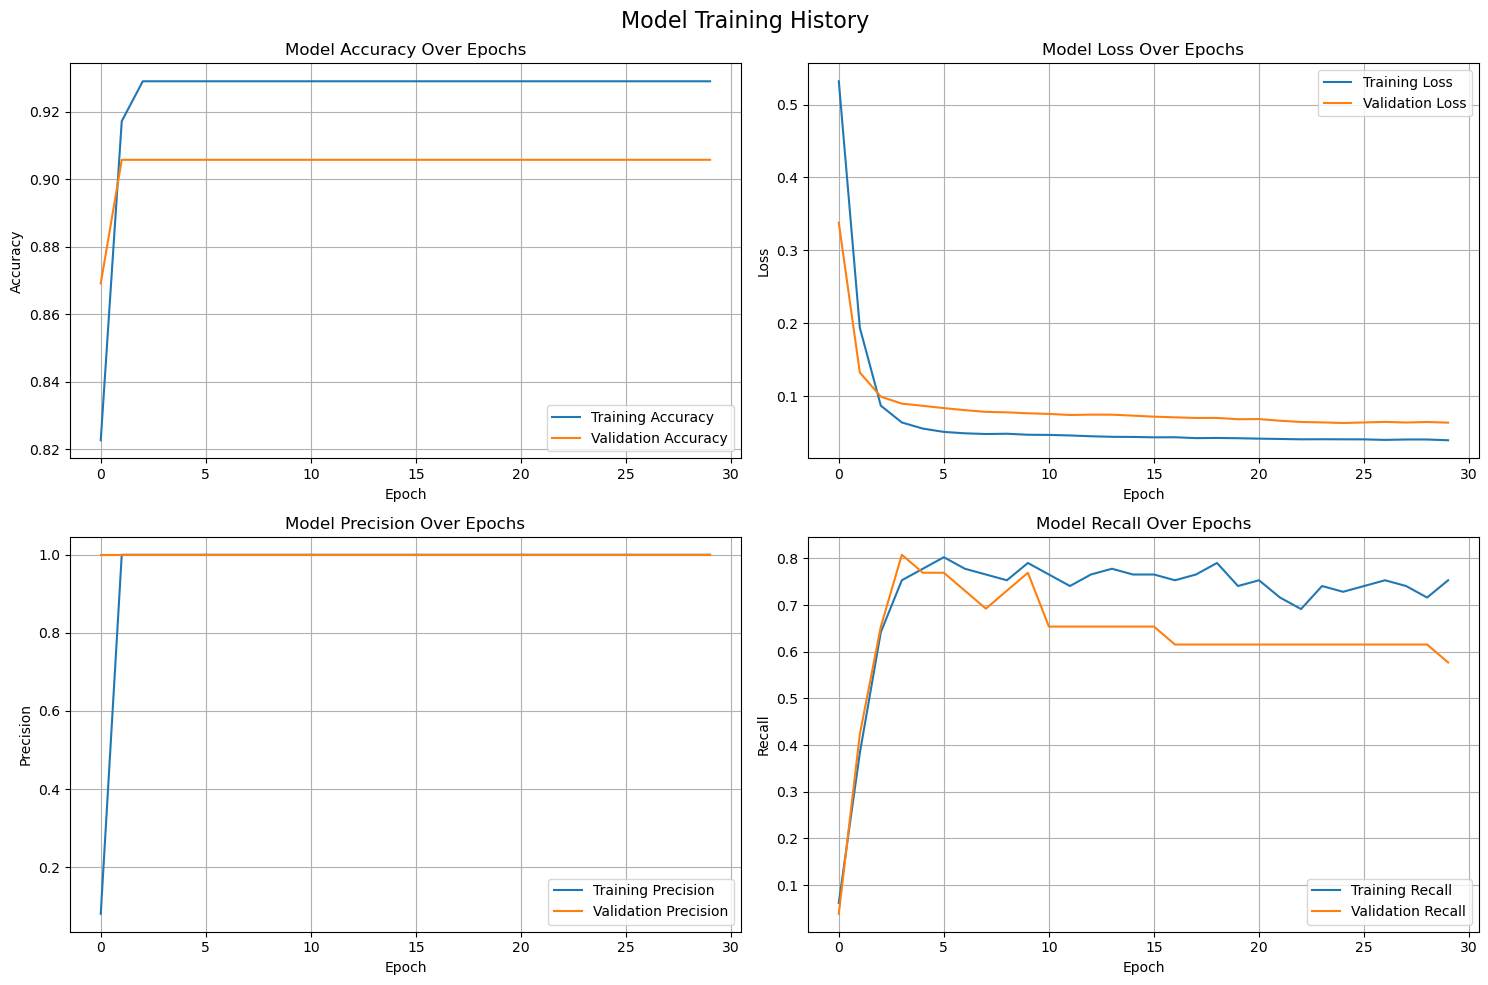

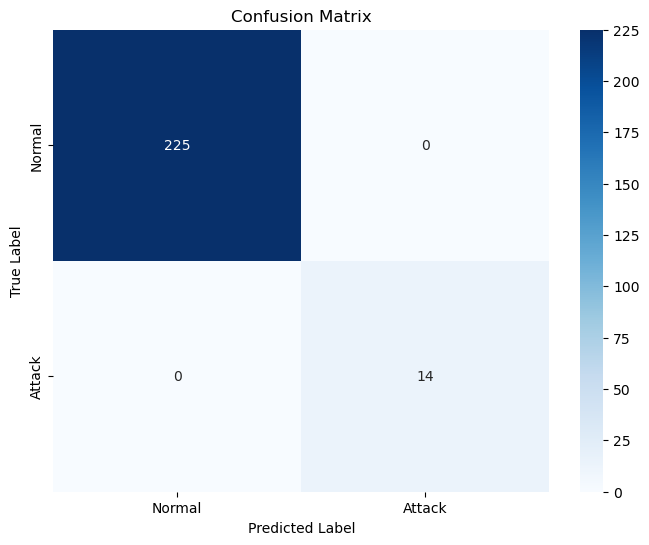

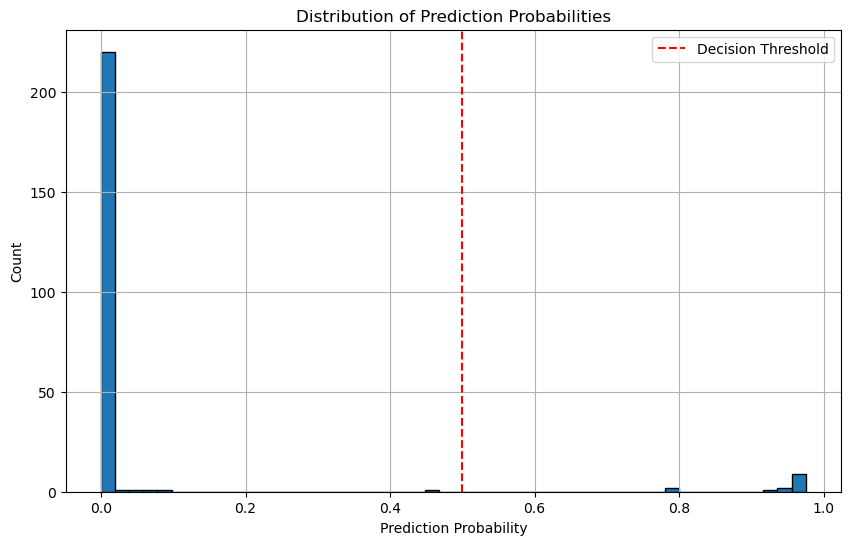

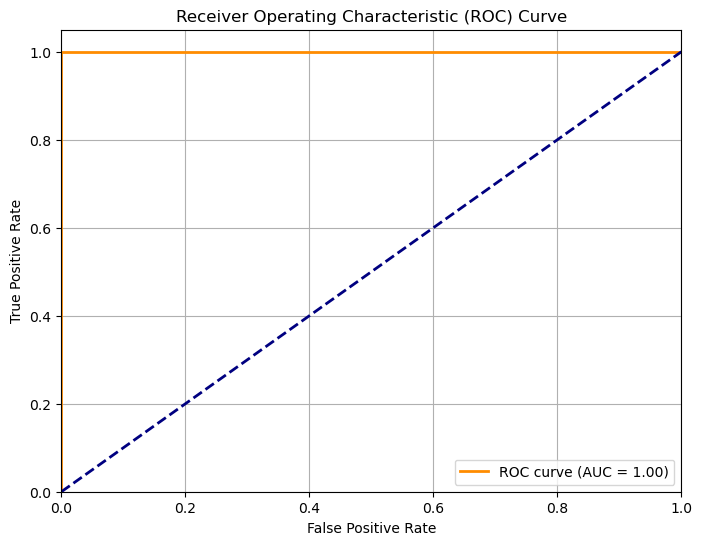

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the data
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
df = df.dropna()
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Attack Category':
        df[col] = label_encoder.fit_transform(df[col])

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Use percentile-based outlier removal
def remove_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
    df_clean = df.copy()
    for col in columns:
        lower = np.percentile(df_clean[col], lower_percentile)
        upper = np.percentile(df_clean[col], upper_percentile)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers_percentile(df, numeric_cols)
print("Dataset shape after cleaning:", df_cleaned.shape)

# Normalize the features
scaler = StandardScaler()
features_to_scale = numeric_cols.drop(['Attack Category', 'Label'])
scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
scaled_df['Attack Category'] = df_cleaned['Attack Category'].values
scaled_df['Label'] = df_cleaned['Label'].values

# Prepare data for LSTM
timesteps = 10
features = len(features_to_scale)
print(f"Number of features: {features}")

# Get features and labels
X = scaled_df.drop(['Attack Category', 'Label'], axis=1).values
y = scaled_df['Label'].values

# Ensure the number of samples is divisible by timesteps
n_samples = (X.shape[0] // timesteps) * timesteps
X = X[:n_samples]
y = y[:n_samples]

# Reshape X into sequences
X = X.reshape(-1, timesteps, features)
# Reshape y to match X's first dimension
y = y.reshape(-1, timesteps).mean(axis=1)

print("Shape of X after reshaping:", X.shape)
print("Shape of y after reshaping:", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFinal shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the model
model = Sequential([
    Input(shape=(timesteps, features)),
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Print model summary
model.summary()

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
print("\nEvaluating model on test set:")
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]*100:.2f}%")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")

# Make predictions and ensure binary values
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()  # Flatten the predictions
y_test_binary = (y_test > 0.5).astype(int)  # Ensure test labels are binary

# Verify shapes and types
print("\nPrediction shapes:")
print("y_test_binary shape:", y_test_binary.shape)
print("y_pred_binary shape:", y_pred_binary.shape)

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("\nConfusion Matrix:")
print(cm)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary))

# Print detailed metrics
print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.4f}")
print(f"Precision: {precision_score(y_test_binary, y_pred_binary, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test_binary, y_pred_binary, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test_binary, y_pred_binary, zero_division=0):.4f}")

# Print first few predictions vs actual values
print("\nFirst few predictions vs actual values:")
for i in range(min(10, len(y_test_binary))):
    print(f"Actual: {y_test_binary[i]}, Predicted: {y_pred_binary[i]}, Raw Prediction: {y_pred[i][0]:.4f}")


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove the problematic style settings
# sns.set()  # Remove this line
# plt.style.use('seaborn')  # Remove this line

def plot_training_history(history):
    """Plot training history metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Training History', fontsize=16)

    # Plot accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Model Accuracy Over Epochs')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Plot loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 1].set_title('Model Loss Over Epochs')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Plot precision
    axes[1, 0].plot(history.history['Precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_Precision'], label='Validation Precision')
    axes[1, 0].set_title('Model Precision Over Epochs')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Plot recall
    axes[1, 1].plot(history.history['Recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_Recall'], label='Validation Recall')
    axes[1, 1].set_title('Model Recall Over Epochs')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm):
    """Plot confusion matrix heatmap"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Attack'],
                yticklabels=['Normal', 'Attack'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_prediction_distribution(y_pred):
    """Plot distribution of prediction probabilities"""
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred, bins=50, edgecolor='black')
    plt.title('Distribution of Prediction Probabilities')
    plt.xlabel('Prediction Probability')
    plt.ylabel('Count')
    plt.axvline(x=0.5, color='r', linestyle='--', label='Decision Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_roc_curve(y_test, y_pred):
    """Plot ROC curve"""
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Create all visualizations
plot_training_history(history)
plot_confusion_matrix(cm)
plot_prediction_distribution(y_pred.flatten())
plot_roc_curve(y_test_binary, y_pred.flatten())

Loading and preprocessing data...
Data shapes:
X_train: (761, 10, 43)
y_train: (761,)
X_val: (191, 10, 43)
y_val: (191,)

Starting PSO optimization...
PSO Iteration 1/20
Evaluating particle 10/10
Iteration 1 best score: 0.9895
PSO Iteration 2/20
Evaluating particle 10/10
Iteration 2 best score: 0.9948
PSO Iteration 3/20
Evaluating particle 10/10
Iteration 3 best score: 0.9948
PSO Iteration 4/20
Evaluating particle 10/10
Iteration 4 best score: 0.9948
PSO Iteration 5/20
Evaluating particle 10/10
Iteration 5 best score: 0.9948
PSO Iteration 6/20
Evaluating particle 10/10
Iteration 6 best score: 0.9948
PSO Iteration 7/20
Evaluating particle 10/10
Iteration 7 best score: 1.0000
PSO Iteration 8/20
Evaluating particle 10/10
Iteration 8 best score: 1.0000
PSO Iteration 9/20
Evaluating particle 10/10
Iteration 9 best score: 1.0000
PSO Iteration 10/20
Evaluating particle 10/10
Iteration 10 best score: 1.0000
PSO Iteration 11/20
Evaluating particle 10/10
Iteration 11 best score: 1.0000
PSO Itera

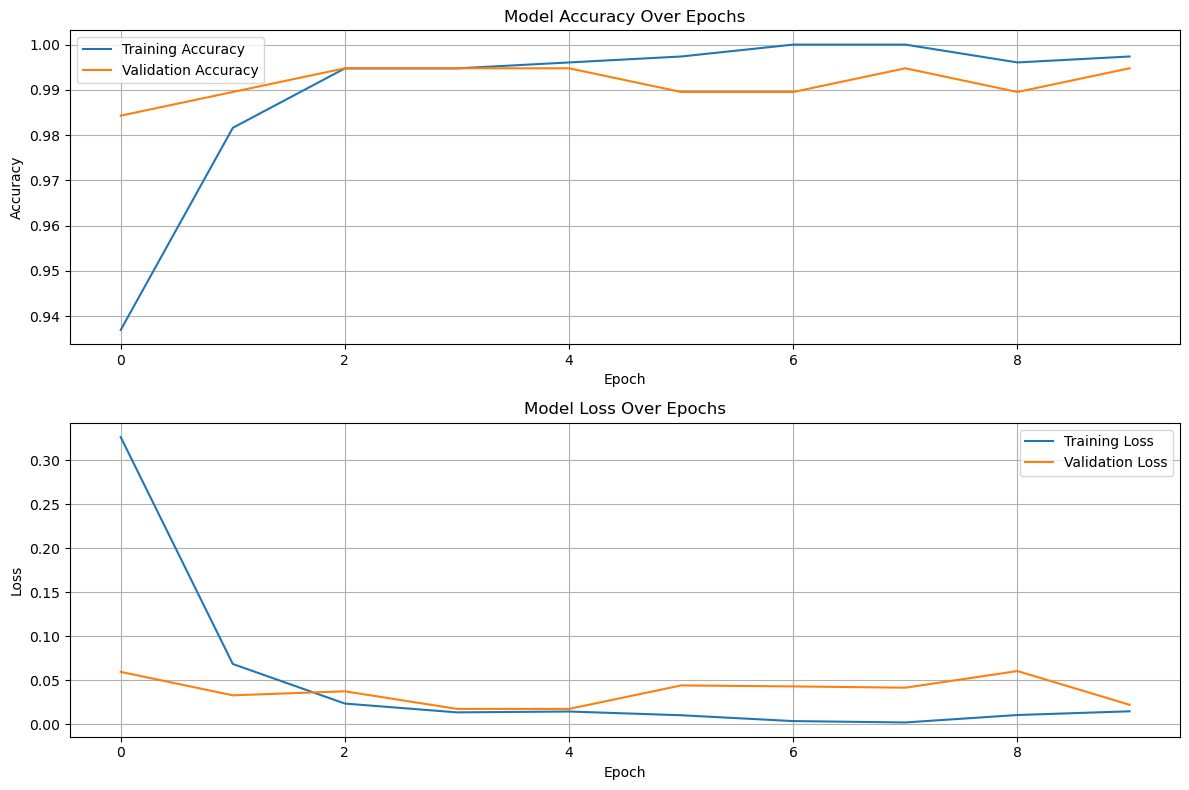


Evaluating final model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step

                    FINAL MODEL METRICS
Accuracy...................... 1.0000
Precision..................... 1.0000
Recall........................ 1.0000
F1 Score...................... 1.0000
Detection Rate................ 1.0000
False Positive Rate........... 0.0000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16084\2158625847.py:195: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


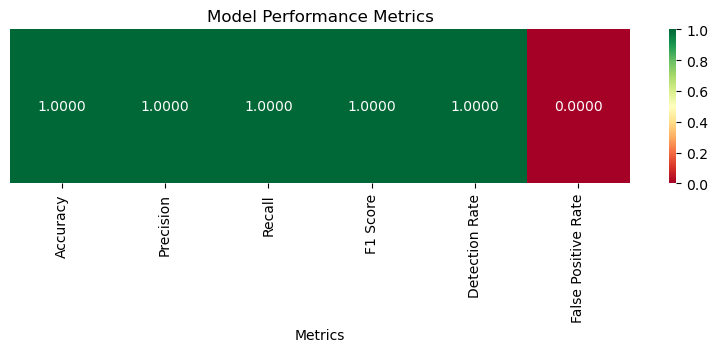

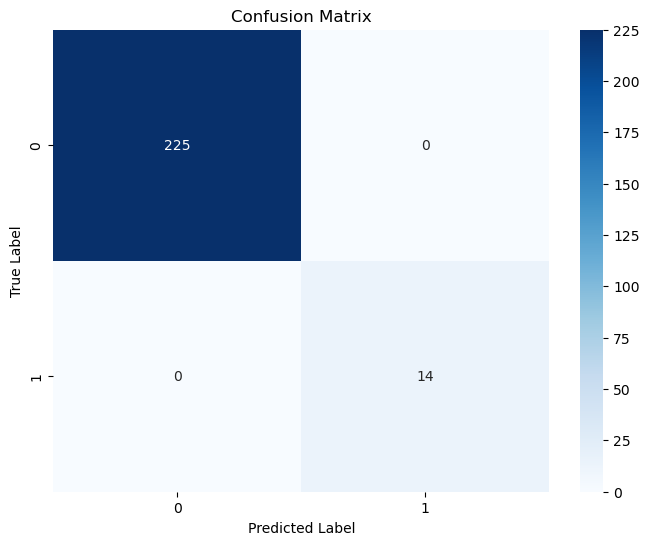


Metrics have been saved to 'model_metrics.csv'

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00        14

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239


Model has been saved as 'optimized_lstm_model.h5'
Training history has been saved as 'training_history.csv'

                    OPTIMIZATION COMPLETE
Files saved:
1. Model: 'optimized_lstm_model.h5'
2. Metrics: 'model_metrics.csv'
3. History: 'training_history.csv'


NameError: name '__file__' is not defined

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sns

class Particle:
    def __init__(self, n_dimensions):
        # Define parameter ranges
        self.param_ranges = {
            'lstm1_units': (32, 128),
            'lstm2_units': (16, 64),
            'dense_units': (8, 32),
            'dropout1': (0.1, 0.5),
            'dropout2': (0.1, 0.5),
            'learning_rate': (0.0001, 0.01)
        }
        
        # Initialize position and velocity
        self.position = self.initialize_position()
        self.velocity = {param: 0.0 for param in self.param_ranges}
        self.best_position = self.position.copy()
        self.best_score = float('-inf')
    
    def initialize_position(self):
        position = {}
        for param, (min_val, max_val) in self.param_ranges.items():
            if param.startswith('lstm') or param.startswith('dense'):
                position[param] = random.randint(min_val, max_val)
            else:
                position[param] = random.uniform(min_val, max_val)
        return position

class PSOOptimizer:
    def __init__(self, n_particles, n_iterations, input_shape):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.input_shape = input_shape
        self.particles = [Particle(n_dimensions=6) for _ in range(n_particles)]
        self.global_best_position = None
        self.global_best_score = float('-inf')
        self.w = 0.729  # Inertia weight
        self.c1 = 1.49445  # Cognitive weight
        self.c2 = 1.49445  # Social weight

    def create_model(self, parameters):
        model = Sequential([
            Input(shape=self.input_shape),
            LSTM(units=int(parameters['lstm1_units']), 
                 return_sequences=True),
            Dropout(parameters['dropout1']),
            LSTM(units=int(parameters['lstm2_units'])),
            Dropout(parameters['dropout2']),
            Dense(units=int(parameters['dense_units']), activation='relu'),
            Dense(units=1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=parameters['learning_rate']),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    
        return model

    def evaluate_model(self, parameters, X_train, y_train, X_val, y_val):
        try:
            model = self.create_model(parameters)
            
            history = model.fit(
                X_train, y_train,
                epochs=10,
                batch_size=32,
                validation_data=(X_val, y_val),
                verbose=0
            )
            
            val_pred_probs = model.predict(X_val, verbose=0)
            val_pred = (val_pred_probs.ravel() > 0.5).astype(int)
            
            y_val_binary = (y_val > 0.5).astype(int)
            
            accuracy = accuracy_score(y_val_binary, val_pred)
            
            tf.keras.backend.clear_session()
            
            return accuracy
        except Exception as e:
            print(f"Error in evaluate_model: {str(e)}")
            return float('-inf')

    def optimize(self, X_train, y_train, X_val, y_val):
        try:
            for iteration in range(self.n_iterations):
                print(f"PSO Iteration {iteration + 1}/{self.n_iterations}")
                
                for i, particle in enumerate(self.particles):
                    print(f"Evaluating particle {i + 1}/{self.n_particles}", end='\r')
                    
                    score = self.evaluate_model(particle.position, X_train, y_train, X_val, y_val)
                    
                    if score > particle.best_score:
                        particle.best_score = score
                        particle.best_position = particle.position.copy()
                    
                    if score > self.global_best_score:
                        self.global_best_score = score
                        self.global_best_position = particle.position.copy()
                
                for particle in self.particles:
                    self.update_particle(particle)
                
                print(f"\nIteration {iteration + 1} best score: {self.global_best_score:.4f}")
            
            return self.global_best_position, self.global_best_score
        except Exception as e:
            print(f"Error in optimize: {str(e)}")
            raise e

    def update_particle(self, particle):
        for param in particle.position:
            r1, r2 = random.random(), random.random()
            cognitive_velocity = self.c1 * r1 * (particle.best_position[param] - particle.position[param])
            social_velocity = self.c2 * r2 * (self.global_best_position[param] - particle.position[param])
            particle.velocity[param] = (self.w * particle.velocity[param] + 
                                     cognitive_velocity + social_velocity)
            
            particle.position[param] += particle.velocity[param]
            
            min_val, max_val = particle.param_ranges[param]
            particle.position[param] = max(min_val, min(max_val, particle.position[param]))
            
            if param.startswith('lstm') or param.startswith('dense'):
                particle.position[param] = int(round(particle.position[param]))

def calculate_detection_rate(y_true, y_pred):
    """Calculate Detection Rate (True Positive Rate)"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def calculate_false_positive_rate(y_true, y_pred):
    """Calculate False Positive Rate"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn)

def plot_training_history(history):
    """Plot training history metrics"""
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy Over Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss Over Epochs')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_metrics_heatmap(metrics_dict):
    """Plot metrics as a heatmap"""
    plt.figure(figsize=(10, 2))
    metrics_df = pd.DataFrame([metrics_dict])
    sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='RdYlGn', 
                cbar=True, yticklabels=False)
    plt.title('Model Performance Metrics')
    plt.xlabel('Metrics')
    plt.tight_layout()
    plt.show()

def print_metrics_table(metrics_dict):
    """Print metrics in a formatted table"""
    print("\n" + "="*60)
    print(" "*20 + "FINAL MODEL METRICS")
    print("="*60)
    for metric, value in metrics_dict.items():
        print(f"{metric:.<30} {value:.4f}")
    print("="*60)

def preprocess_data(df):
    """Preprocess the data for LSTM model"""
    # Drop NA and duplicates
    df = df.dropna()
    df = df.drop_duplicates()
    
    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Attack Category'] = label_encoder.fit_transform(df['Attack Category'])
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != 'Attack Category':
            df[col] = label_encoder.fit_transform(df[col])
    
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    def remove_outliers_percentile(df, columns, lower_percentile=1, upper_percentile=99):
        df_clean = df.copy()
        for col in columns:
            lower = np.percentile(df_clean[col], lower_percentile)
            upper = np.percentile(df_clean[col], upper_percentile)
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        return df_clean
    
    df_cleaned = remove_outliers_percentile(df, numeric_cols)
    
    # Normalize features
    scaler = StandardScaler()
    features_to_scale = numeric_cols.drop(['Attack Category', 'Label'])
    scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])
    scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)
    scaled_df['Label'] = df_cleaned['Label'].values
    
    # Prepare data for LSTM
    timesteps = 10
    features = len(features_to_scale)
    
    # Get features and labels
    X = scaled_df.drop(['Label'], axis=1).values
    y = scaled_df['Label'].values
    
    # Ensure number of samples is divisible by timesteps
    n_samples = (X.shape[0] // timesteps) * timesteps
    X = X[:n_samples]
    y = y[:n_samples]
    
    # Reshape X into sequences
    X = X.reshape(-1, timesteps, features)
    # Reshape y to match X's first dimension
    y = y.reshape(-1, timesteps).mean(axis=1)
    
    # Ensure y is binary
    y = (y > 0.5).astype(int)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    try:
        # Set random seeds for reproducibility
        random.seed(42)
        np.random.seed(42)
        tf.random.set_seed(42)
        
        # Load and preprocess data
        print("Loading and preprocessing data...")
        df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
        X_train, X_test, y_train, y_test = preprocess_data(df)
        
        # Split training data into train and validation for PSO
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )
        
        print("Data shapes:")
        print(f"X_train: {X_train.shape}")
        print(f"y_train: {y_train.shape}")
        print(f"X_val: {X_val.shape}")
        print(f"y_val: {y_val.shape}")
        
        # Initialize and run PSO
        print("\nStarting PSO optimization...")
        input_shape = (X_train.shape[1], X_train.shape[2])
        pso = PSOOptimizer(n_particles=10, n_iterations=20, input_shape=input_shape)
        best_params, best_score = pso.optimize(X_train, y_train, X_val, y_val)
        
        print("\nBest parameters found by PSO:")
        for param, value in best_params.items():
            print(f"{param}: {value}")
        print(f"Best validation accuracy: {best_score}")
        
        # Train final model with best parameters
        print("\nTraining final model with best parameters...")
        final_model = pso.create_model(best_params)
        history = final_model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            )],
            verbose=1
        )
        
        # Plot training history
        plot_training_history(history)
        
        # Evaluate final model
        print("\nEvaluating final model...")
        test_pred_probs = final_model.predict(X_test)
        test_pred = (test_pred_probs.ravel() > 0.5).astype(int)
        
        # Calculate all metrics
        metrics = {
            'Accuracy': accuracy_score(y_test, test_pred),
            'Precision': precision_score(y_test, test_pred),
            'Recall': recall_score(y_test, test_pred),
            'F1 Score': f1_score(y_test, test_pred),
            'Detection Rate': calculate_detection_rate(y_test, test_pred),
            'False Positive Rate': calculate_false_positive_rate(y_test, test_pred)
        }
        
        # Print metrics in formatted table
        print_metrics_table(metrics)
        
        # Plot metrics heatmap
        plot_metrics_heatmap(metrics)
        
        # Plot confusion matrix
        plot_confusion_matrix(y_test, test_pred)
        
        # Save metrics to CSV
        metrics_df = pd.DataFrame([metrics])
        metrics_df.to_csv('model_metrics.csv', index=False)
        print("\nMetrics have been saved to 'model_metrics.csv'")
        
        # Print detailed classification report
        print("\nDetailed Classification Report:")
        print("="*60)
        print(classification_report(y_test, test_pred))
        
         # Save the model
        final_model.save('optimized_lstm_model.h5')
        print("\nModel has been saved as 'optimized_lstm_model.h5'")
        
        # Save the history
        history_df = pd.DataFrame(history.history)
        history_df.to_csv('training_history.csv', index=False)
        print("Training history has been saved as 'training_history.csv'")
        
        # Print final summary
        print("\n" + "="*60)
        print(" "*20 + "OPTIMIZATION COMPLETE")
        print("="*60)
        print("Files saved:")
        print("1. Model: 'optimized_lstm_model.h5'")
        print("2. Metrics: 'model_metrics.csv'")
        print("3. History: 'training_history.csv'")
        print("="*60)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise e

    # Add model deployment function
    def load_and_predict(model_path, new_data):
        """
        Load the saved model and make predictions on new data
        
        Parameters:
        model_path (str): Path to the saved model file
        new_data (numpy.array): Preprocessed data in the correct shape
        
        Returns:
        numpy.array: Predictions
        """
        try:
            # Load the saved model
            loaded_model = tf.keras.models.load_model(model_path)
            
            # Make predictions
            predictions_prob = loaded_model.predict(new_data)
            predictions = (predictions_prob.ravel() > 0.5).astype(int)
            
            return predictions, predictions_prob
            
        except Exception as e:
            print(f"Error in prediction: {str(e)}")
            raise e
    
    if __name__ == "__main__" and __package__ is None:
        import sys
        from pathlib import Path
        file = Path(__file__).resolve()
        parent, top = file.parent, file.parents[1]
        sys.path.append(str(top))
        try:
            sys.path.remove(str(parent))
        except ValueError:
            pass
        import lstm_pso_optimizer

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import accuracy_score
import random

class Particle:
    def __init__(self):
        self.param_ranges = {
            'lstm1_units': (32, 64),  # Reduced range
            'dropout1': (0.1, 0.3),   # Narrowed dropout range
            'learning_rate': (0.001, 0.01)
        }
        self.position = self.initialize_position()
        self.velocity = {param: 0.0 for param in self.param_ranges}
        self.best_position = self.position.copy()
        self.best_score = float('-inf')
    
    def initialize_position(self):
        position = {}
        for param, (min_val, max_val) in self.param_ranges.items():
            if param.startswith('lstm'):
                position[param] = random.randint(min_val, max_val)
            else:
                position[param] = random.uniform(min_val, max_val)
        return position

class PSOOptimizer:
    def __init__(self, n_particles, n_iterations, input_shape):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.input_shape = input_shape
        self.particles = [Particle() for _ in range(n_particles)]
        self.global_best_position = None
        self.global_best_score = float('-inf')
        self.w = 0.7
        self.c1 = 1.4
        self.c2 = 1.4

    def create_model(self, parameters):
        model = Sequential([
            Input(shape=self.input_shape),
            LSTM(units=int(parameters['lstm1_units'])),
            Dropout(parameters['dropout1']),
            Dense(units=1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=parameters['learning_rate']),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

    def evaluate_model(self, parameters, X_train, y_train, X_val, y_val):
        try:
            model = self.create_model(parameters)
            history = model.fit(
                X_train, y_train,
                epochs=5,  # Reduced epochs
                batch_size=64,  # Increased batch size
                validation_data=(X_val, y_val),
                verbose=0
            )
            val_pred = (model.predict(X_val, verbose=0).ravel() > 0.5).astype(int)
            accuracy = accuracy_score((y_val > 0.5).astype(int), val_pred)
            tf.keras.backend.clear_session()
            return accuracy
        except:
            return float('-inf')

    def optimize(self, X_train, y_train, X_val, y_val):
        for iteration in range(self.n_iterations):
            print(f"PSO Iteration {iteration + 1}/{self.n_iterations}")
            
            for i, particle in enumerate(self.particles):
                score = self.evaluate_model(particle.position, X_train, y_train, X_val, y_val)
                
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()
            
            for particle in self.particles:
                self.update_particle(particle)
            
            print(f"Best accuracy: {self.global_best_score * 100:.2f}%")
        
        return self.global_best_position, self.global_best_score

    def update_particle(self, particle):
        for param in particle.position:
            r1, r2 = random.random(), random.random()
            cognitive = self.c1 * r1 * (particle.best_position[param] - particle.position[param])
            social = self.c2 * r2 * (self.global_best_position[param] - particle.position[param])
            particle.velocity[param] = self.w * particle.velocity[param] + cognitive + social
            particle.position[param] += particle.velocity[param]
            
            min_val, max_val = particle.param_ranges[param]
            particle.position[param] = max(min_val, min(max_val, particle.position[param]))
            if param.startswith('lstm'):
                particle.position[param] = int(round(particle.position[param]))

def preprocess_data(df):
    df = df.dropna().drop_duplicates()
    
    label_encoder = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(['Label'])
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    X = df[numeric_cols].values
    y = df['Label'].values
    
    # Reshape for LSTM with smaller sequence length
    timesteps = 5  # Reduced from 10
    n_features = X.shape[1]
    n_samples = (X.shape[0] // timesteps) * timesteps
    X = X[:n_samples].reshape(-1, timesteps, n_features)
    y = y[:n_samples].reshape(-1, timesteps).mean(axis=1)
    y = (y > 0.5).astype(int)
    
    return train_test_split(X, y, test_size=0.2, random_state=42)

if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    
    print("Loading data...")
    df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
    X_train, X_test, y_train, y_test = preprocess_data(df)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    print("Starting optimization...")
    pso = PSOOptimizer(n_particles=5, n_iterations=10, input_shape=(X_train.shape[1], X_train.shape[2]))
    best_params, best_score = pso.optimize(X_train, y_train, X_val, y_val)
    
    print("\nFinal Results:")
    print(f"Best validation accuracy: {best_score * 100:.2f}%")
    print("\nBest parameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    
    final_model = pso.create_model(best_params)
    final_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
    test_pred = (final_model.predict(X_test) > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"\nTest accuracy: {test_accuracy * 100:.2f}%")

Loading data...
Starting optimization...
PSO Iteration 1/10

Best accuracy: 99.62%
PSO Iteration 2/10
Best accuracy: 99.62%
PSO Iteration 3/10
Best accuracy: 99.62%
PSO Iteration 4/10
Best accuracy: 99.62%
PSO Iteration 5/10
Best accuracy: 99.62%
PSO Iteration 6/10
Best accuracy: 99.81%
PSO Iteration 7/10
Best accuracy: 100.00%
PSO Iteration 8/10
Best accuracy: 100.00%
PSO Iteration 9/10
Best accuracy: 100.00%
PSO Iteration 10/10
Best accuracy: 100.00%

Final Results:
Best validation accuracy: 100.00%

Best parameters:
lstm1_units: 41
dropout1: 0.2790684545334905
learning_rate: 0.01
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9125 - loss: 0.2567 - val_accuracy: 0.9923 - val_loss: 0.0201
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9986 - loss: 0.0083 - val_accuracy: 0.9962 - val_loss: 0.0105
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9962 - val_loss: 0.0105
Epoch 4/10
33/33 ━━━━━━━━━━━━━━

Loading data...
Starting optimization...
PSO Iteration 1/10
Best accuracy: 99.62%
PSO Iteration 2/10
Best accuracy: 99.62%
PSO Iteration 3/10
Best accuracy: 99.62%
PSO Iteration 4/10
Best accuracy: 99.62%
PSO Iteration 5/10
Best accuracy: 99.62%
PSO Iteration 6/10
Best accuracy: 99.81%
PSO Iteration 7/10
Best accuracy: 100.00%
PSO Iteration 8/10
Best accuracy: 100.00%
PSO Iteration 9/10
Best accuracy: 100.00%
PSO Iteration 10/10
Best accuracy: 100.00%

Final Results:
Best validation accuracy: 100.00%

Best parameters:
lstm1_units: 41
dropout1: 0.2790684545334905
learning_rate: 0.01
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9125 - loss: 0.2567 - val_accuracy: 0.9923 - val_loss: 0.0201
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9986 - loss: 0.0083 - val_accuracy: 0.9962 - val_loss: 0.0105
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9962 - val_loss: 0.0105
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━

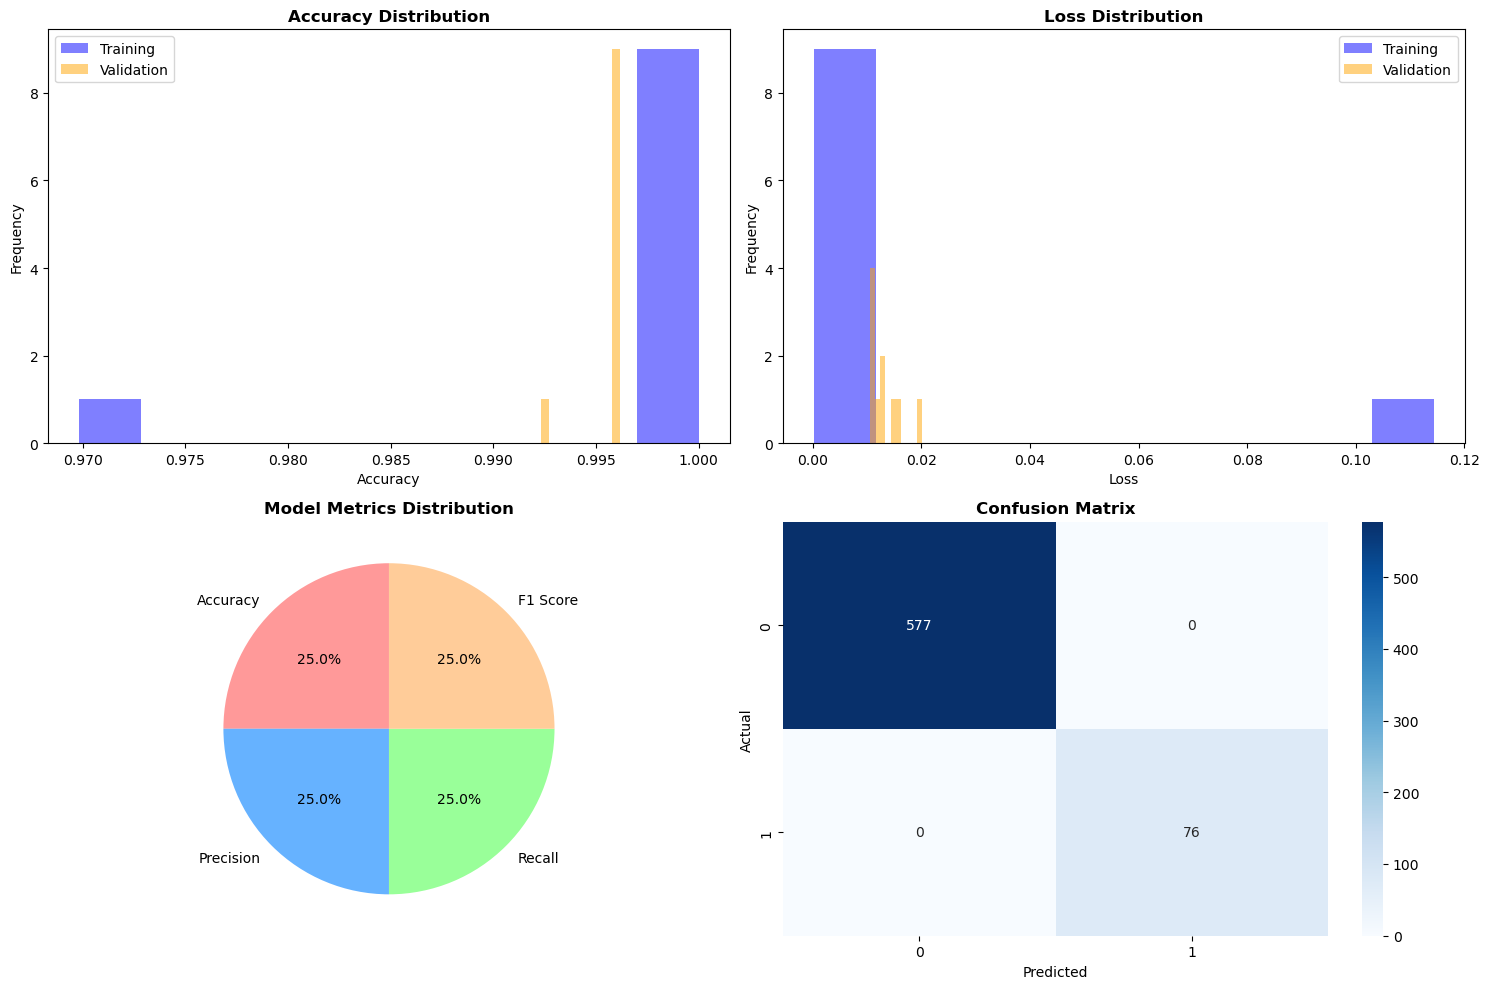

BlockingIOError: [Errno 11] Unable to create file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable', Win32 GetLastError() = 33)

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random
import matplotlib.pyplot as plt
import seaborn as sns

class Particle:
    def __init__(self):
        self.param_ranges = {
            'lstm1_units': (32, 64),
            'dropout1': (0.1, 0.3),
            'learning_rate': (0.001, 0.01)
        }
        self.position = self.initialize_position()
        self.velocity = {param: 0.0 for param in self.param_ranges}
        self.best_position = self.position.copy()
        self.best_score = float('-inf')
    
    def initialize_position(self):
        position = {}
        for param, (min_val, max_val) in self.param_ranges.items():
            if param.startswith('lstm'):
                position[param] = random.randint(min_val, max_val)
            else:
                position[param] = random.uniform(min_val, max_val)
        return position

class PSOOptimizer:
    def __init__(self, n_particles, n_iterations, input_shape):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.input_shape = input_shape
        self.particles = [Particle() for _ in range(n_particles)]
        self.global_best_position = None
        self.global_best_score = float('-inf')
        self.w = 0.7
        self.c1 = 1.4
        self.c2 = 1.4
        self.training_history = []

    def create_model(self, parameters):
        model = Sequential([
            Input(shape=self.input_shape),
            LSTM(units=int(parameters['lstm1_units'])),
            Dropout(parameters['dropout1']),
            Dense(units=1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=parameters['learning_rate']),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

    def evaluate_model(self, parameters, X_train, y_train, X_val, y_val):
        try:
            model = self.create_model(parameters)
            history = model.fit(
                X_train, y_train,
                epochs=5,
                batch_size=64,
                validation_data=(X_val, y_val),
                verbose=0
            )
            self.training_history.append(history.history)
            val_pred = (model.predict(X_val, verbose=0).ravel() > 0.5).astype(int)
            accuracy = accuracy_score((y_val > 0.5).astype(int), val_pred)
            tf.keras.backend.clear_session()
            return accuracy
        except:
            return float('-inf')

    def optimize(self, X_train, y_train, X_val, y_val):
        for iteration in range(self.n_iterations):
            print(f"PSO Iteration {iteration + 1}/{self.n_iterations}")
            
            for i, particle in enumerate(self.particles):
                score = self.evaluate_model(particle.position, X_train, y_train, X_val, y_val)
                
                if score > particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                
                if score > self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()
            
            for particle in self.particles:
                self.update_particle(particle)
            
            print(f"Best accuracy: {self.global_best_score * 100:.2f}%")
        
        return self.global_best_position, self.global_best_score

    def update_particle(self, particle):
        for param in particle.position:
            r1, r2 = random.random(), random.random()
            cognitive = self.c1 * r1 * (particle.best_position[param] - particle.position[param])
            social = self.c2 * r2 * (self.global_best_position[param] - particle.position[param])
            particle.velocity[param] = self.w * particle.velocity[param] + cognitive + social
            particle.position[param] += particle.velocity[param]
            
            min_val, max_val = particle.param_ranges[param]
            particle.position[param] = max(min_val, min(max_val, particle.position[param]))
            if param.startswith('lstm'):
                particle.position[param] = int(round(particle.position[param]))

def preprocess_data(df):
    df = df.dropna().drop_duplicates()
    
    label_encoder = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(['Label'])
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    X = df[numeric_cols].values
    y = df['Label'].values
    
    timesteps = 5
    n_features = X.shape[1]
    n_samples = (X.shape[0] // timesteps) * timesteps
    X = X[:n_samples].reshape(-1, timesteps, n_features)
    y = y[:n_samples].reshape(-1, timesteps).mean(axis=1)
    y = (y > 0.5).astype(int)
    
    return train_test_split(X, y, test_size=0.2, random_state=42)

def plot_metrics(history, metrics_dict, y_test, test_pred):
    # Remove problematic style
    fig = plt.figure(figsize=(15, 10))
    
    # Accuracy Histogram
    plt.subplot(2, 2, 1)
    plt.hist(history.history['accuracy'], bins=10, alpha=0.5, label='Training', color='blue')
    plt.hist(history.history['val_accuracy'], bins=10, alpha=0.5, label='Validation', color='orange')
    plt.title('Accuracy Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()

    # Loss Histogram
    plt.subplot(2, 2, 2)
    plt.hist(history.history['loss'], bins=10, alpha=0.5, label='Training', color='blue')
    plt.hist(history.history['val_loss'], bins=10, alpha=0.5, label='Validation', color='orange')
    plt.title('Loss Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Loss')
    plt.ylabel('Frequency')
    plt.legend()

    # Metrics Pie Chart
    plt.subplot(2, 2, 3)
    metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    metrics_values = [metrics_dict[key] for key in metrics_labels]
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
    plt.pie(metrics_values, labels=metrics_labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Model Metrics Distribution', fontsize=12, fontweight='bold')

    # Confusion Matrix Heatmap
    plt.subplot(2, 2, 4)
    cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    plt.savefig('model_metrics.png', dpi=300, bbox_inches='tight')

def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    
    print("Loading data...")
    df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
    X_train, X_test, y_train, y_test = preprocess_data(df)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    print("Starting optimization...")
    pso = PSOOptimizer(n_particles=5, n_iterations=10, input_shape=(X_train.shape[1], X_train.shape[2]))
    best_params, best_score = pso.optimize(X_train, y_train, X_val, y_val)
    
    print("\nFinal Results:")
    print(f"Best validation accuracy: {best_score * 100:.2f}%")
    print("\nBest parameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    
    final_model = pso.create_model(best_params)
    history = final_model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    test_pred = (final_model.predict(X_test) > 0.5).astype(int)
    metrics_dict = calculate_metrics(y_test, test_pred)
    
    print("\nTest Metrics:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value * 100:.2f}%")
    
    # Plot and save visualizations
    plot_metrics(history, metrics_dict, y_test, test_pred)
    
    # Save the model
    final_model.save('optimized_lstm_model.h5')